<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/sound/sound_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2022-01-31
* 조녁 코딩일기를  참고해서 공부하며 작성하였습니다
* https://jonhyuk0922.tistory.com/114?category=944701
* https://www.kaggle.com/andradaolteanu/work-w-audio-data-visualise-classify-recommend

### 1. 데이터셋 다운로드

In [ ]:
import librosa

# librosa.load() : 오디오 파일을 로드
y , sr = librosa.load('Data/genres_original/reggae/reggae.00036.wav') 

print(y)
print(len(y))
print(y.shape)
print('Sampling rate (Hz): %d' %sr)
print('Audio length (seconds): %.2f' % (len(y) / sr)) 
#음악의 길이(초) = 음파의 길이/Sampling rate

[0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388]
661794
(661794,)
Sampling rate (Hz): 22050
Audio length (seconds): 30.01


### 2. 음악 들어보기

In [ ]:
import IPython.display as ipd
ipd.Audio(y, rate=sr)

### 3. 음악 그래프

* 2D 그래프

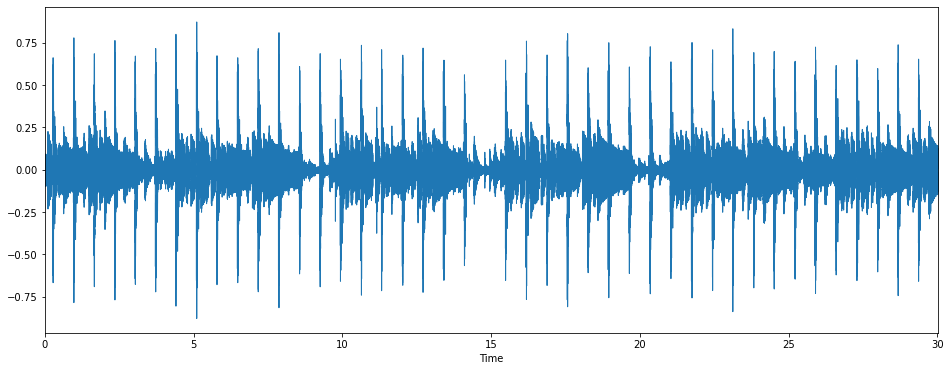

In [ ]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize =(16,6))
librosa.display.waveplot(y=y,sr=sr)
plt.show()

* Fourier Transform(푸리에 변환)
* 시간 영역 데이터를 주파수 영역으로 변경

(1025, 1293)


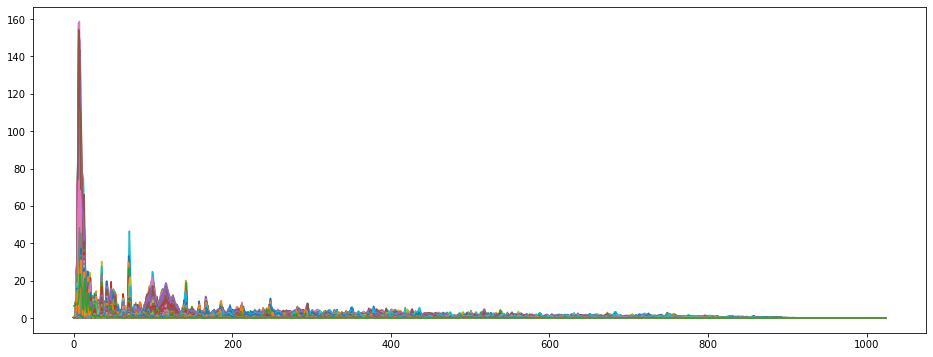

In [ ]:
import numpy as np

# n_fft : window size
# 음성의 길이를 얼마만큼으로 자를 것인가? => window
Fourier = np.abs(librosa.stft(y, n_fft=2048, hop_length=512)) 

print(Fourier.shape)

plt.figure(figsize=(16,6))
plt.plot(Fourier)
plt.show()

* Spectogram
* 시간에 따른 신호 주파수의 스펙트럼 그래프

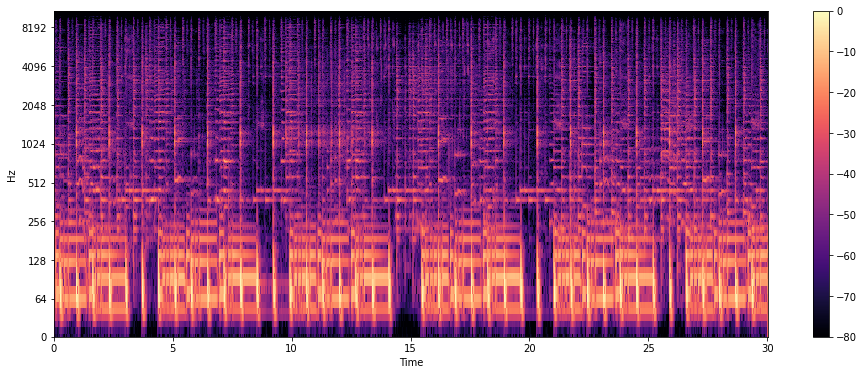

In [ ]:
# amplitude(진폭) -> DB(데시벨)로 바꿔라
DB = librosa.amplitude_to_db(Fourier, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(DB,sr=sr, hop_length=512, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

* Mel Spectogram
* Spectogram의 y축을 Mel Scale로 변환한 것

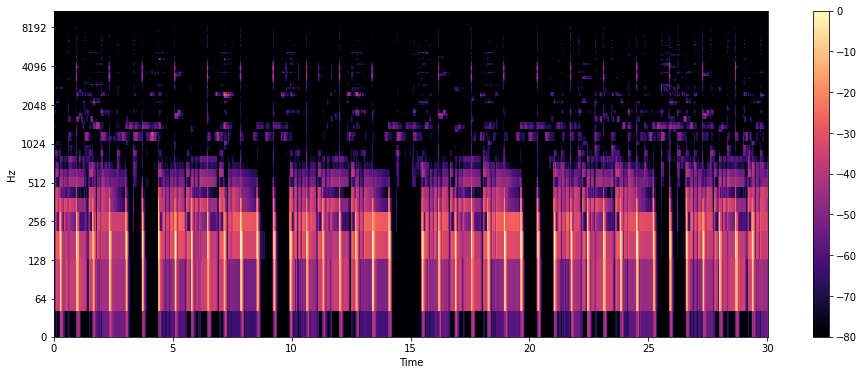

In [ ]:
Mel = librosa.feature.melspectrogram(y, sr=sr)
Mel_DB = librosa.amplitude_to_db(Mel, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(Mel_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

### 4. 레게 vs 클래식 그래프 비교

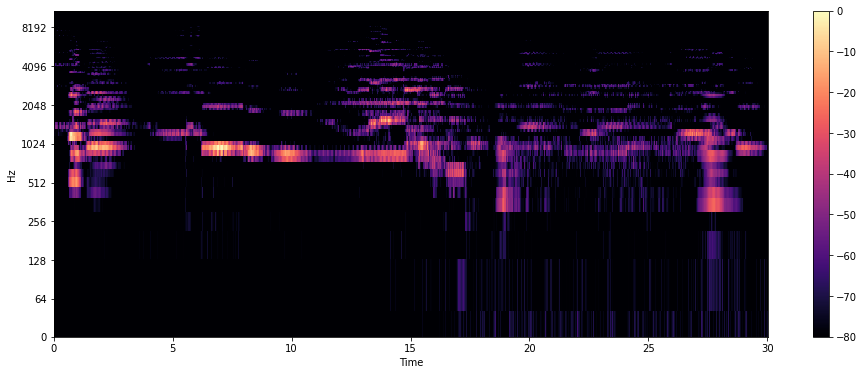

In [ ]:
y, sr = librosa.load('Data/genres_original/classical/classical.00036.wav')
y, _ = librosa.effects.trim(y)

S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(16,6))
librosa.display.specshow(S_DB, sr=sr,hop_length=512, x_axis='time',y_axis='log')
plt.colorbar()
plt.show()

### 5. 오디오 특성추출 (Audio Feature Extraction)

* tempo (BPM)

In [ ]:
tempo , _ = librosa.beat.beat_track(y,sr=sr)     
print(tempo)

107.666015625


* Zero Crossing Rate
* 음파가 양에서 음으로 또는 음에서 양으로 바뀌는 비율

In [ ]:
# 0이 되는 선을 지나친 횟수
zero_crossings = librosa.zero_crossings(y, pad=False)

print(zero_crossings)
print(sum(zero_crossings)) # 음 <-> 양 이동한 횟수

[False False False ... False False False]
39405


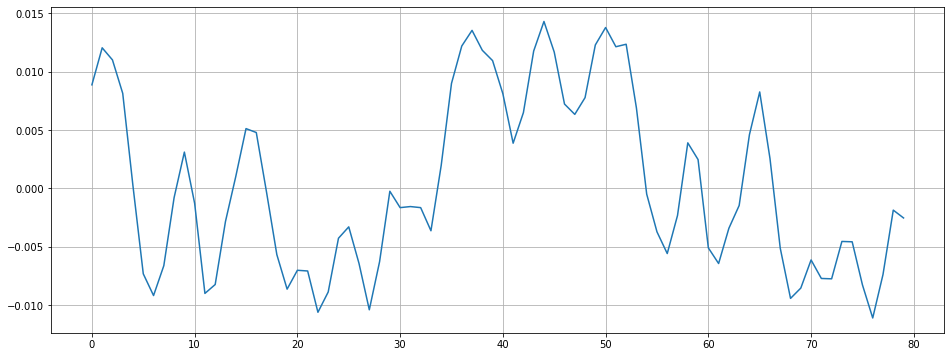

In [ ]:
n0 = 9000
n1 = 9080

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

* 0 이하 세어보면.. 11 개?

In [ ]:
 #n0 ~ n1 사이 zero crossings 
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

11


### 6. 특징 추출

#### 1) Harmonic & Percussive Components
* Harmonics : 사람의 귀로 구분할 수 없는 특징들(음악의 색깔)
* Percussives: 리듬과 감정을 나타내는 충격파

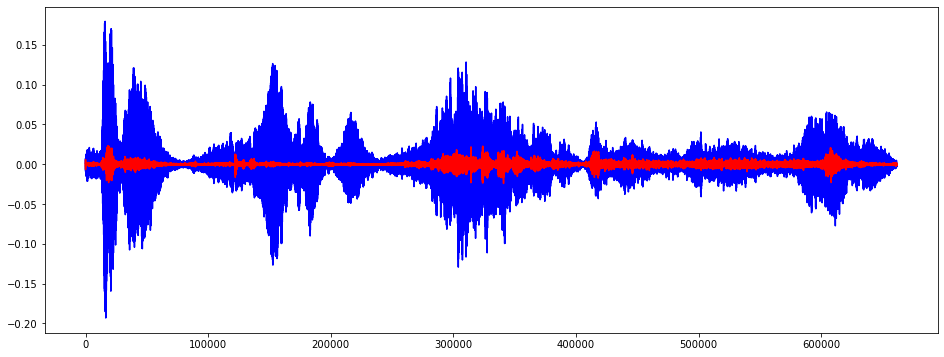

In [ ]:
y_harm, y_perc = librosa.effects.hpss(y)

plt.figure(figsize=(16,6))
plt.plot(y_harm, color='b')
plt.plot(y_perc, color='r')
plt.show()

#### 2) Spectral Centroid
* 소리를 주파수 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게 중심"이 어딘지를 알려주는 지표
* red 가 무게중심

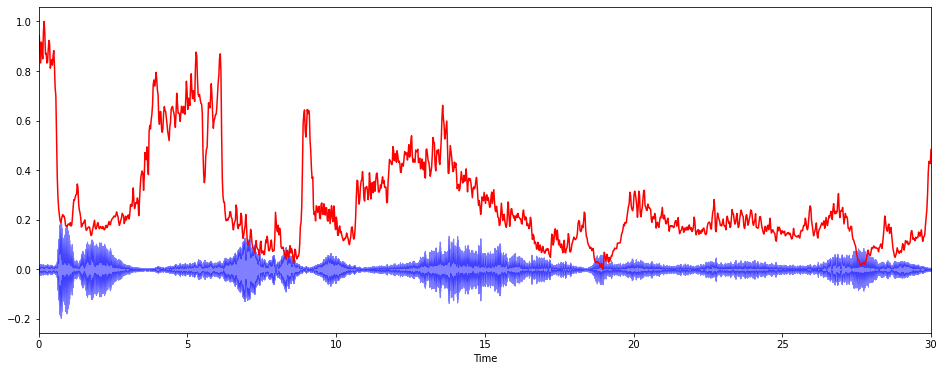

In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

#Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
# sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.
  return sklearn.preprocessing.minmax_scale(x, axis=axis) 

plt.figure(figsize=(16,6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

#### 3) Spectral Rolloff
* 신호 모양을 측정
* 총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

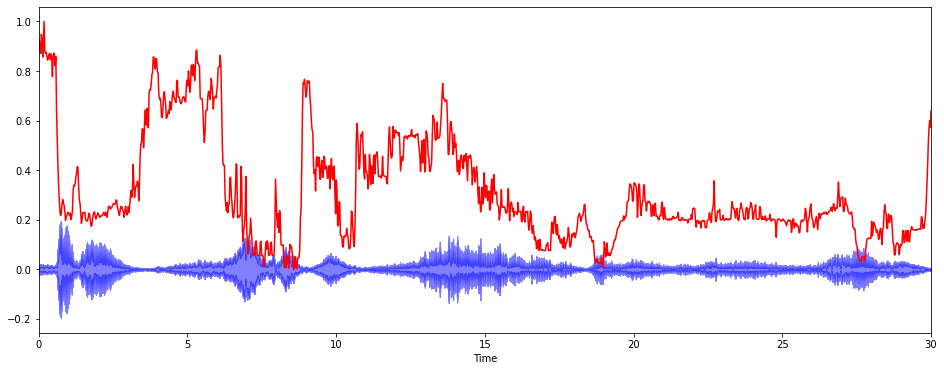

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

plt.figure(figsize=(16,6))
librosa.display.waveplot(y,sr=sr,alpha=0.5,color='b')
plt.plot(t, normalize(spectral_rolloff),color='r')
plt.show()

#### 4) Mel-Frequency Cepstral Coefficients(MFCCs)
* MFCCs는 특징들의 작은 집합(약 10-20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여줌
* 사람의 청각 구조를 반영하여 음성 정보 추출

mean : 0.48
var : 0.04


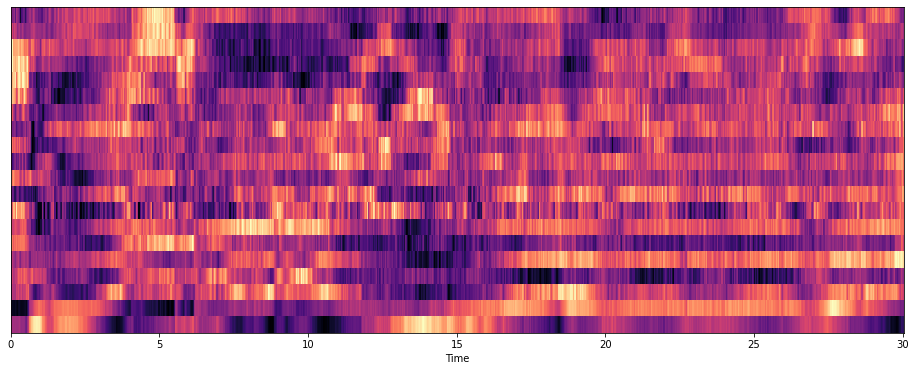

In [ ]:
mfccs = librosa.feature.mfcc(y, sr=sr)
mfccs = normalize(mfccs,axis=1)

print('mean : %.2f' % mfccs.mean())
print('var : %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

### 5) Chroma Frequencies
* 크로마 특징은 음악의 흥미롭고 강렬한 표현

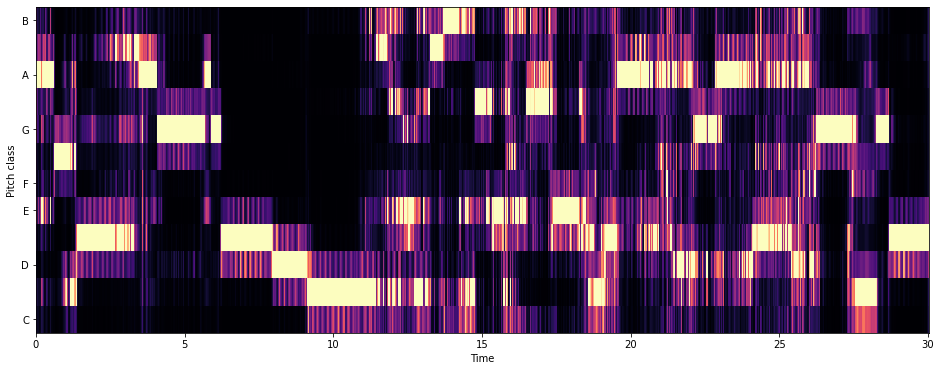

In [ ]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=512)

plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram,x_axis='time', y_axis='chroma', hop_length=512)
plt.show()

### 7. 음악 장르 분류

#### 1) 데이터 로드

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')  # 그래프 테두리 모두 제거


In [ ]:
df = pd.read_csv('Data/features_3_sec.csv')

df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

#### 2) 데이터 전처리

In [ ]:
X = df.drop(columns=['filename','length','label']) # 필요 없는것!
y = df['label'] #장르명

scaler = MinMaxScaler()   # scale 0~1 조정
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0          0.355399         0.716757  0.293133  0.107955   
1          0.367322         0.670347  0.253040  0.044447   
2          0.373159         0.728067  0.296753  0.141663   
3          0.399349         0.677066  0.298024  0.075042   
4          0.355668         0.689113  0.322308  0.052149   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                0.262173               0.034784                 0.459205   
1                0.270969               0.018716                 0.470831   
2                0.265293               0.023073                 0.494051   
3                0.238427               0.023187                 0.455246   
4                0.233460               0.016451                 0.451651   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0                0.094130      0.346153     0.083164  ...     0.363613   
1                0.052261      0.363722     0.051694  ...     0.468596   
2                0.059922      0.378215     0.060820  ...     0.479681   
3                0.066234      0.329587     0.070906  ...     0.386258   
4                0.047830      0.318453     0.046916  ...     0.438567   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0    0.056198     0.397172    0.066062     0.371828    0.055344     0.380831   
1    0.092912     0.351681    0.074001     0.362068    0.076365     0.418452   
2    0.096704     0.420979    0.050639     0.400536    0.067509     0.433742   
3    0.067995     0.387474    0.050617     0.380430    0.050030     0.405824   
4    0.042500     0.460314    0.083860     0.388590    0.076524     0.409019   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0    0.026797     0.506746    0.047781  
1    0.082414     0.593029    0.065548  
2    0.043841     0.546264    0.036062  
3    0.041898     0.562204    0.034873  
4    0.020763     0.517913    0.031713  

[5 rows x 57 columns]

#### 3) train, test 분할

In [ ]:
X_train , X_test , y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


#### 4) 모델 구축

* xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=100, learning_rate=0.05) #1000개의 가지, 0.05 학습률

xgb.fit(X_train, y_train) #학습

print("xgb Test Accuarcy : {}%".format(round(xgb.score(X_test, y_test) * 100, 2)))

C:\Users\82106\anaconda3\envs\gani\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:00:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb Test Accuarcy : 84.08%


* LogisticRegression

In [ ]:
lr = LogisticRegression(solver = "lbfgs")
lr.fit(X_train, y_train)

print("lr Test Accuarcy : {}%".format(round(lr.score(X_test, y_test) * 100, 2)))

lr Test Accuarcy : 70.12%


C:\Users\82106\anaconda3\envs\gani\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

print("rf Test Accuarcy : {}%".format(round(rf.score(X_test, y_test) * 100, 2)))

rf Test Accuarcy : 87.34%


* Decision Tree

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24],
    'min_samples_split' : [16, 24]
}

grid_dt = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_dt.fit(X_train, y_train)

print('최상의 교차검증 정확도 {:.2f}'.format(grid_dt.best_score_))
print("rf Test Accuarcy : {}%".format(round(grid_dt.score(X_test, y_test) * 100, 2)))
print('최적의 매개변수 : {}'.format(grid_dt.best_params_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
최상의 교차검증 정확도 0.61
rf Test Accuarcy : 64.31%
최적의 매개변수 : {'max_depth': 24, 'min_samples_split': 16}


#### 5) Confusion Matrix

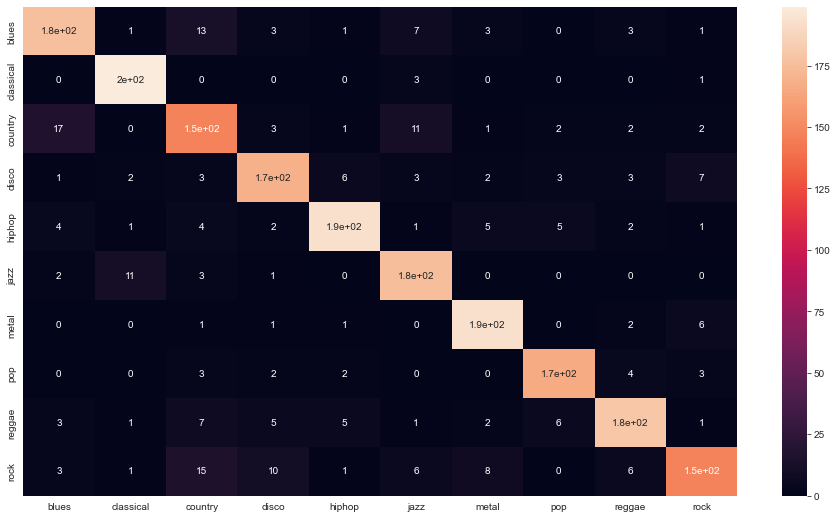

In [ ]:
y_preds = rf.predict(X_test) #검증

cm = confusion_matrix(y_test,y_preds)

plt.figure(figsize=(16,9))
sns.heatmap(
    cm,
    annot=True,
    xticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"],
    yticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]
)
plt.show()

#### 6) 특성중요도

In [ ]:
for feature, importance in zip(X_test.columns, rf.feature_importances_):
  print('%s: %.2f' % (feature, importance))   #어떤 특징이 중요했는지 보여줌

chroma_stft_mean: 0.04
chroma_stft_var: 0.02
rms_mean: 0.04
rms_var: 0.04
spectral_centroid_mean: 0.02
spectral_centroid_var: 0.02
spectral_bandwidth_mean: 0.03
spectral_bandwidth_var: 0.02
rolloff_mean: 0.02
rolloff_var: 0.02
zero_crossing_rate_mean: 0.02
zero_crossing_rate_var: 0.01
harmony_mean: 0.02
harmony_var: 0.02
perceptr_mean: 0.03
perceptr_var: 0.05
tempo: 0.01
mfcc1_mean: 0.03
mfcc1_var: 0.02
mfcc2_mean: 0.02
mfcc2_var: 0.01
mfcc3_mean: 0.02
mfcc3_var: 0.02
mfcc4_mean: 0.03
mfcc4_var: 0.02
mfcc5_mean: 0.01
mfcc5_var: 0.02
mfcc6_mean: 0.02
mfcc6_var: 0.01
mfcc7_mean: 0.02
mfcc7_var: 0.01
mfcc8_mean: 0.02
mfcc8_var: 0.01
mfcc9_mean: 0.02
mfcc9_var: 0.01
mfcc10_mean: 0.01
mfcc10_var: 0.01
mfcc11_mean: 0.02
mfcc11_var: 0.01
mfcc12_mean: 0.02
mfcc12_var: 0.01
mfcc13_mean: 0.02
mfcc13_var: 0.01
mfcc14_mean: 0.01
mfcc14_var: 0.01
mfcc15_mean: 0.01
mfcc15_var: 0.01
mfcc16_mean: 0.01
mfcc16_var: 0.01
mfcc17_mean: 0.01
mfcc17_var: 0.01
mfcc18_mean: 0.01
mfcc18_var: 0.01
mfcc19_mean: 0

### 8. 노래 추천

#### 1) 데이터 로드

In [ ]:
df_30 = pd.read_csv('Data/features_30_sec.csv', index_col='filename')

labels = df_30[['label']]
df_30 = df_30.drop(columns=['length','label'])

df_30_scaled = StandardScaler().fit_transform(df_30)    #평균 0 , 표준편차 1 

df_30 = pd.DataFrame(df_30_scaled, columns=df_30.columns)

df_30.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0         -0.350137         0.312587 -0.010690 -0.061856   
1         -0.462482         1.117572 -0.532852 -0.186821   
2         -0.184225        -0.137701  0.679978 -0.084093   
3          0.319639         0.990659  0.154810  0.907029   
4         -0.859077         0.194163 -0.600165 -0.205909   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -0.583585              -0.848311                -0.456402   
1               -0.938516              -0.234194                -0.386852   
2               -0.906885              -0.781694                -0.940663   
3               -1.581429              -0.712095                -1.228256   
4               -0.512542              -0.315178                -0.939770   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0               -0.531042     -0.486473    -0.661934  ...    -0.086396   
1                0.796252     -0.648681     0.795823  ...    -0.048102   
2               -0.630916     -0.971592    -0.744406  ...     0.284825   
3                0.304565     -1.516390    -0.246530  ...    -0.080249   
4               -0.504463     -0.630107    -0.190517  ...    -1.238616   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0   -0.246114     0.500462   -0.780265    -0.237040   -0.643177     0.006723   
1   -0.159175     0.711371   -0.069304    -0.054982   -0.453456     0.544806   
2   -0.596243    -0.827516   -0.448091    -0.600983   -0.329519    -0.295934   
3   -0.482843     0.142153   -0.371370     0.033427   -0.767591     0.455409   
4    0.751318    -0.327220    0.377620    -0.368375   -0.293696    -0.553016   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0   -0.300597     0.604064   -0.512988  
1   -0.407087     0.424127   -0.538421  
2   -0.527297    -0.296189   -0.874954  
3   -0.779744    -0.602881   -0.844508  
4   -0.089383    -2.766009   -0.330287  

[5 rows x 57 columns]

#### 2) 유사도 설정

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# 벡터의 유사도 , 즉 벡터간의 각도를 통해 추정 cos0 =1 이므로 1에 가까울 수록 유사
# cos180 = -1 이므로 -1에 가까울 수록 다르다.
similarity = cosine_similarity(df_30)   

sim_df = pd.DataFrame(similarity, index=labels.index, columns=labels.index)

sim_df.head()

filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  ...  rock.00090.wav  rock.00091.wav  \
filename                          ...                                   
blues.00000.wav        -0.097889  ...       -0.082829        0.546169   
blues.00001.wav         0.404168  ...       -0.098111       -0.325126   
blues.00002.wav        -0.132532  ...       -0.032408        0.561074   
blues.00003.wav         0.295184  ...       -0.320107       -0.206516   
blues.00004.wav         0.471657  ...        0.087605        0.017366   

filename         rock.00092.wav  rock.00093.wav  rock.00094.wav  \
filename                                                          
blues.00000.wav        0.578558        0.662590        0.571629   
blues.00001.wav       -0.370792       -0.191698       -0.330834   
blues.00002.wav        0.590779        0.583293        0.514537   
blues.00003.wav       -0.151132        0.041986       -0.172515   
blues.00004.wav        0.138035        0.104684       -0.034594   

filename         rock.00095.wav  rock.00096.wav  rock.00097.wav  \
filename                                                          
blues.00000.wav        0.610942        0.640835        0.496294   
blues.00001.wav       -0.077301       -0.222119       -0.302573   
blues.00002.wav        0.495707        0.566837        0.589983   
blues.00003.wav       -0.000287        0.020515       -0.107821   
blues.00004.wav        0.063454        0.063546        0.172944   

filename         rock.00098.wav  rock.00099.wav  
filename                                         
blues.00000.wav        0.284958        0.304098  
blues.00001.wav        0.499562        0.311723  
blues.00002.wav        0.216378        0.321069  
blues.00003.wav        0.502279        0.183210  
blues.00004.wav        0.153192        0.061785  

[5 rows x 1000 columns]

* 함수화

In [ ]:
def find_similar_songs(name, n=5):
  series = sim_df[name].sort_values(ascending=False)

  series = series.drop(name)

  return series.head(n).to_frame()

find_similar_songs('rock.00000.wav')

rock.00000.wav
filename                         
rock.00079.wav           0.681819
rock.00026.wav           0.677842
country.00070.wav        0.675324
rock.00064.wav           0.662020
rock.00096.wav           0.654814

In [ ]:
# pop.00019 - Britney Spears "Hit me baby one more time"
find_similar_songs('pop.00019.wav') 

ipd.Audio(f'Data/genres_original/rock/rock.00079.wav')

* vs code 로는 재생이 안된ㄷㅏ.. 난 colab 으로 실행했땅